In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from matplotlib import rc
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.titlesize'] = 18

# Beirut explosion

Fit from: 
 * [Dewey, *The TNT and ANFO equivalences of the Beirut explosion* Shock Waves DOI: 10.1007/s00193-021-00992-1 (2021)](https://link.springer.com/article/10.1007%2Fs00193-021-00992-1)
 
Data from: 
 * [Rigby et al. *Preliminary yield estimation of the 2020 Beirut explosion using video footage from social media.* Shock Waves 30, 671–675 (2020)](https://link.springer.com/article/10.1007%2Fs00193-020-00970-z)
 * [Diaz *Explosion analysis from images: Trinity and Beirut* 2021 Eur. J. Phys. DOI: 10.1088/1361-6404/abe131 (2021)](https://iopscience.iop.org/article/10.1088/1361-6404/abe131)

In [13]:
tnt2j = 4.294  # 4.294 MJ/kg
kg2j = tnt2j*1e6
kt2j = kg2j*1e6
ton2j = kg2j*1e3

P0 = 0.1e6  # atmospheric pressure
rho0 = 1.23  # air density
a0 = np.sqrt(1.4 * P0 / rho0)  # speed of sound

# Beirut explosion
data_source = ['Diaz', 'Rigby et al.']
df_beirut = pd.DataFrame()
dfs = []
for name in data_source:
    df_tmp = pd.read_excel('data/Beirut_Explosion.xlsx', sheet_name=name, usecols='A:D')
    e0 = df_tmp['Yield (kt)'][0]*kt2j
    df_tmp['Source']   = [name]*len(df_tmp)
    df_tmp['Test']     = ['Beirut']*len(df_tmp)
    df_tmp['Yield']    = [df_tmp['Yield (kt)'][0]]*len(df_tmp)
    del df_tmp['Yield (kt)']
    df_beirut = pd.concat([df_beirut, df_tmp], axis=0, ignore_index=True)
    dfs.append(df_tmp)

In [40]:
dfs[1].head()

,R (m),t (s),Feature,Source,Test,Yield
0,563,1.167,Audio,Rigby et al.,Beirut,0.5
1,566,1.068,Audio,Rigby et al.,Beirut,0.5
2,572,1.068,Audio,Rigby et al.,Beirut,0.5
3,630,1.277,Audio,Rigby et al.,Beirut,0.5
4,675,1.667,Audio,Rigby et al.,Beirut,0.5


In [16]:
# R vs t from Dewey Eq (1)
def R_T(t):
    A, B, C = -13.5289, 53.1742, -58.3335
    return A + a0*t + B * np.log(1 + a0*t) + C * np.sqrt(np.log(1 + a0*t))

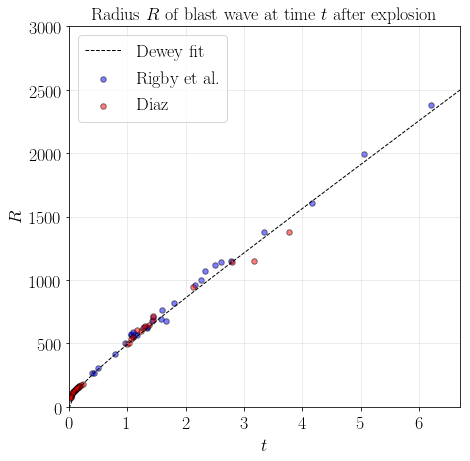

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = 0, 6.7
ymin, ymax = 0, 3000

t_axis = np.linspace(0, 7, 100)

ax.scatter(dfs[1]['t (s)'], dfs[1]['R (m)'], s=30, marker='o', color='b', edgecolor='k', alpha=.5, label='Rigby et al.')
ax.scatter(dfs[0]['t (s)'], dfs[0]['R (m)'], s=30, marker='o', color='r', edgecolor='k', alpha=.5, label='Diaz')
ax.plot(t_axis, R_T(t_axis), 'k--', linewidth=1, label='Dewey fit')
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], 
#        xscale='log', yscale='log',
       xlabel=r'$t$', ylabel=r'$R$',
       title=r'Radius $R$ of blast wave at time $t$ after explosion')
ax.grid(zorder=-1, alpha=.5, linewidth=0.5)
ax.legend(loc='upper left');

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = 0, 6.7
ymin, ymax = 0, 3000

t_axis = np.linspace(0, 7, 100)

ax.scatter(dfs[1]['t (s)'], dfs[1]['R (m)'], s=30, marker='o', color='b', edgecolor='k', alpha=.5, label='Rigby et al.')
ax.scatter(dfs[0]['t (s)'], dfs[0]['R (m)'], s=30, marker='o', color='r', edgecolor='k', alpha=.5, label='Diaz')
ax.plot(t_axis, R_T(t_axis), 'k--', linewidth=1, label='Dewey fit')
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], 
#        xscale='log', yscale='log',
       xlabel=r'$t$', ylabel=r'$R$',
       title=r'Radius $R$ of blast wave at time $t$ after explosion')
ax.grid(zorder=-1, alpha=.5, linewidth=0.5)
ax.legend(loc='upper left');

98.98586633335364

In [2]:
df = pd.read_csv('data/GITaylor_Trinity_data.csv')

In [23]:
df['t_sec'] = df['t_msec'] * 1e-3  # convert msec to sec

df['log10_t'] = df['t_sec'].apply(lambda x: np.log10(x))
df['5/2*log10_R'] = df['R_m'].apply(lambda x: 5/2*np.log10(x))
df.head()

,t_msec,R_m,t_sec,log10_t,log10_R,5/2*log10_R
0,0.10,11.1,0.00010,-4.000000,2.613307,2.613307
1,0.24,19.9,0.00024,-3.619789,3.247133,3.247133
2,0.38,25.4,0.00038,-3.420216,3.512084,3.512084
3,0.52,28.8,0.00052,-3.283997,3.648481,3.648481
4,0.66,31.9,0.00066,-3.180456,3.759477,3.759477


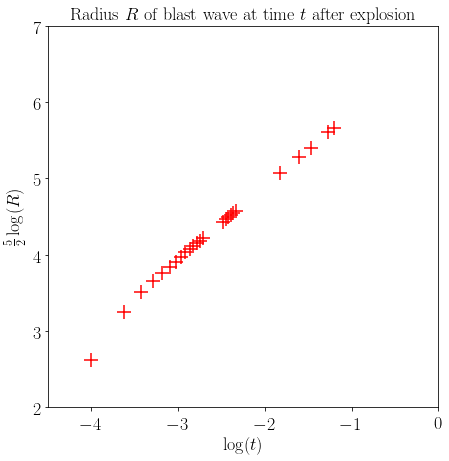

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.5, 0
ymin, ymax = 2, 7
ax.scatter(df['log10_t'], df['5/2*log10_R'], s=180, marker='+', color='r')
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], 
       xlabel=r'$\log(t)$', ylabel=r'$\frac{5}{2}\log(R)$',
       title=r'Radius $R$ of blast wave at time $t$ after explosion');

Let us fit a straight line to this data using a simple linear regression

In [15]:
# set up data
X = df['log10_t'].values.reshape(1, -1).T
y = df['5/2*log10_R'].values
y.shape, X.shape

((25,), (25, 1))

In [17]:
# fit Linear Regression: y = mx+n
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(f'slope    : m = {model.coef_[0]:.2f}')
print(f'intercept: n = {model.intercept_:.2f}')

slope    : m = 1.01
intercept: n = 6.94


c:\users\jsdiaz\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


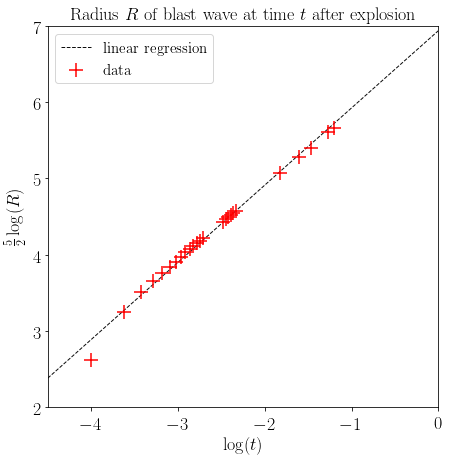

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.5, 0
ymin, ymax = 2, 7

ax.scatter(df['log10_t'], df['5/2*log10_R'], s=180, marker='+', color='r', label='data', zorder=10)
# plot linear fit
logt = np.linspace(xmin, xmax, 2)
ax.plot(logt, model.intercept_ + model.coef_[0] * logt, 'k--', linewidth=1, 
        label=f'linear regression', zorder=0, alpha=0.95)

ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], 
       xlabel=r'$\log(t)$', ylabel=r'$\frac{5}{2}\log(R)$',
       title=r'Radius $R$ of blast wave at time $t$ after explosion');
ax.legend(fontsize=15);
# fig.savefig('plots/TrinityBlastWave-Taylor.pdf', bbox_inches='tight')

The energy is given in terms of the intercept $n$ as

$$ E_0 = \frac{10^{2n}\rho_0}{S(\gamma)^5} $$

where $\rho_0$=1.23 kg/m$^3$ in the density of the undisturbed air and the constant for air ($\gamma=1.4$) is $S(1.4)^{-5}$ = 0.856.

In [22]:
# explosion yield in kt TNT
# 1 TJ = 4.25 kt TNT
E0 = 10**(2*model.intercept_) * 0.856 * 1.23
print(f'E = {E0 / ( 4.25e12):.1f} kt TNT  ({E0:.2E} J)')

E = 19.0 kt TNT  (8.05E+13 J)
